In [1]:
import numpy as np
from matplotlib import pyplot
from matplotlib import ticker
import netCDF4
R_v=461.5
rho_l=997
def A(T):
      sigma = 0.07275 * (1-0.002 * (T-291))
      A=2*sigma/(rho_l*R_v*T)
      return A


def S_eq(rw,kappa,rd,T):
    return (rw**3-rd**3)/(rw**3-(1-kappa)*rd**3)*np.exp(A(T)/rw)

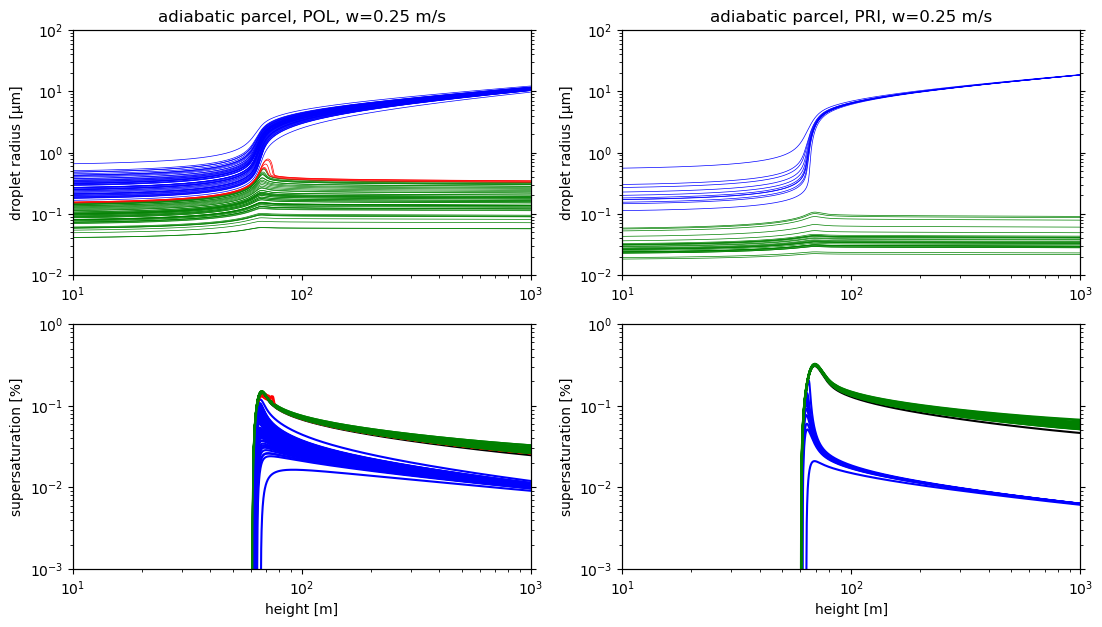

In [2]:
w_cm_per_s=25
fig, axs = pyplot.subplots(2, 2, figsize=(13, 7))
axS1, axS2, axR1, axR2 = [axs[1,0], axs[1,1], axs[0,0], axs[0,1]]

for aerosol, i in (("polluted",0),("pristine",1)):
    fp="../../cmake-build-debug/tests/Grabowski_and_Pawlowska_2023/"+aerosol+"_"+str(w_cm_per_s)+".nc"
    nc = netCDF4.Dataset(fp)
    vertical_velocity=getattr(nc, 'vertical velocity (m s-1)')
    dt=getattr(nc,'dt (s)')
    RH=nc['RH'][:]
    T=nc['T'][:]
    rw=np.sqrt(np.asarray(nc['wet radius squared'][:]))
    rw_cr=(np.asarray(nc['critical radius cubed'][:]))**(1/3)
    rd=(np.asarray(nc['dry radius cubed'][:]))**(1/3)
    kappa=nc['kappa'][:]
    z=np.arange(len(RH))*vertical_velocity*dt
    axs[1,i].plot(z,(np.asarray(RH)-1)*100, color='black')
    for drop_id in range(len(rw[0])):
        if drop_id%4==0:
            RH_eq=S_eq(rw[:,drop_id],kappa[:,drop_id],rd[:,drop_id],T)
            if np.all(rw[:,drop_id]<rw_cr[:,drop_id]):
                    axs[0,i].plot(
                        z,
                        rw[:,drop_id]*1e6,
                        linewidth=0.5,
                        color='green'
                    )
                    axs[1,i].plot(z, (np.asarray(RH_eq)-1)*100, color='green')
            elif rw[:,drop_id][-1]<rw_cr[:,drop_id][-1]:
                    axs[0,i].plot(
                        z,
                        rw[:,drop_id]*1e6,
                        linewidth=0.5,
                        color='red'
                    )       
                    axs[1,i].plot(z, (np.asarray(RH_eq)-1)*100, color='red')
            else:
                    axs[0,i].plot(
                        z,
                        rw[:,drop_id]*1e6,
                        linewidth=0.5,
                        color='blue'
                    )            
                    axs[1,i].plot(z, (np.asarray(RH_eq)-1)*100, color='blue')
    


axS1_, axS2_, axR1_, axR2_ = [axS1.twinx(),axS2.twinx(),axR1.twinx(),axR2.twinx()]
for ax in [axS1, axS1_, axS2, axS2_, axR1, axR1_, axR2, axR2_]:
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xlim(10, 1000)
for ax in [axS1,axS1_,axS2,axS2_]:
    ax.set_ylim(0.001, 1)
for ax in [axR1,axR1_,axR2,axR2_]:
    ax.set_ylim(0.01, 100)
for ax in [axR1,axR2]:
    ax.set_ylabel('droplet radius [μm]')
axR1.set_title(f'adiabatic parcel, POL, w={vertical_velocity} m/s')
axR2.set_title(f'adiabatic parcel, PRI, w={vertical_velocity} m/s')
for ax in [axS1,axS2]:
    ax.set_xlabel('height [m]')
    ax.set_ylabel('supersaturation [%]') 
for ax in [axS1_,axS2_,axR1_,axR2_]:
    ax.yaxis.set_major_formatter(ticker.NullFormatter())
pyplot.savefig('fig1_cpp', dpi=300)
pyplot.show()

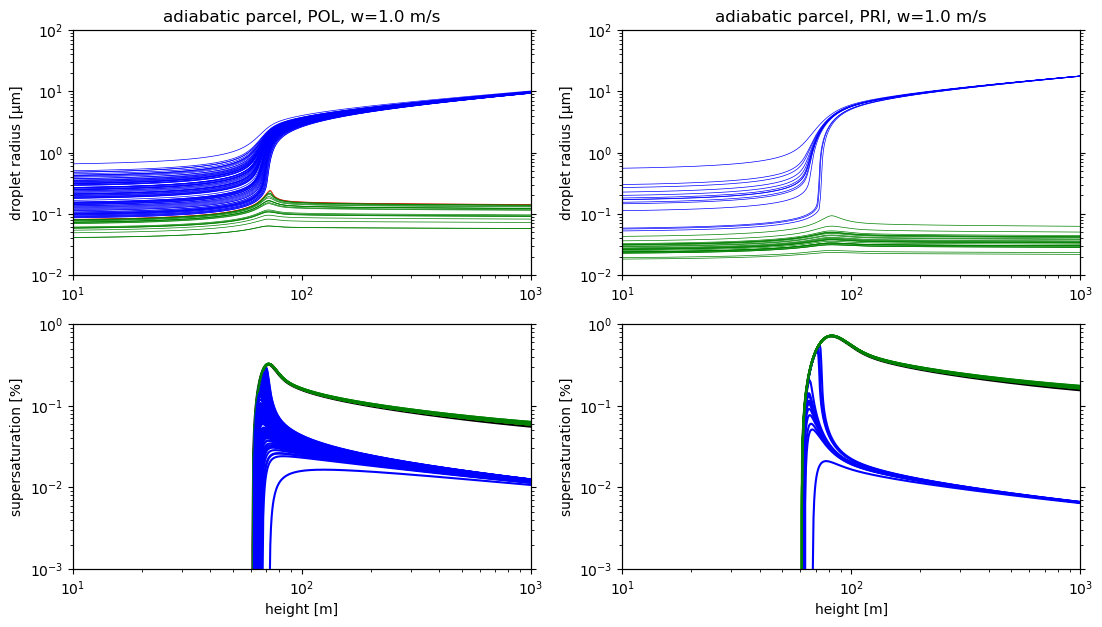

In [3]:
w_cm_per_s=100
fig, axs = pyplot.subplots(2, 2, figsize=(13, 7))
axS1, axS2, axR1, axR2 = [axs[1,0], axs[1,1], axs[0,0], axs[0,1]]

for aerosol, i in (("polluted",0),("pristine",1)):
    fp="../../cmake-build-debug/tests/Grabowski_and_Pawlowska_2023/"+aerosol+"_"+str(w_cm_per_s)+".nc"
    nc = netCDF4.Dataset(fp)
    vertical_velocity=getattr(nc, 'vertical velocity (m s-1)')
    dt=getattr(nc,'dt (s)')
    RH=nc['RH'][:]
    T=nc['T'][:]
    rw=np.sqrt(np.asarray(nc['wet radius squared'][:]))
    rw_cr=(np.asarray(nc['critical radius cubed'][:]))**(1/3)
    rd=(np.asarray(nc['dry radius cubed'][:]))**(1/3)
    kappa=nc['kappa'][:]
    z=np.arange(len(RH))*vertical_velocity*dt
    axs[1,i].plot(z,(np.asarray(RH)-1)*100, color='black')
    for drop_id in range(len(rw[0])):
        if drop_id%4==0:
            RH_eq=S_eq(rw[:,drop_id],kappa[:,drop_id],rd[:,drop_id],T)
            if np.all(rw[:,drop_id]<rw_cr[:,drop_id]):
                    axs[0,i].plot(
                        z,
                        rw[:,drop_id]*1e6,
                        linewidth=0.5,
                        color='green'
                    )
                    axs[1,i].plot(z, (np.asarray(RH_eq)-1)*100, color='green')
            elif rw[:,drop_id][-1]<rw_cr[:,drop_id][-1]:
                    axs[0,i].plot(
                        z,
                        rw[:,drop_id]*1e6,
                        linewidth=0.5,
                        color='red'
                    )       
                    axs[1,i].plot(z, (np.asarray(RH_eq)-1)*100, color='red')
            else:
                    axs[0,i].plot(
                        z,
                        rw[:,drop_id]*1e6,
                        linewidth=0.5,
                        color='blue'
                    )            
                    axs[1,i].plot(z, (np.asarray(RH_eq)-1)*100, color='blue')
    


axS1_, axS2_, axR1_, axR2_ = [axS1.twinx(),axS2.twinx(),axR1.twinx(),axR2.twinx()]
for ax in [axS1, axS1_, axS2, axS2_, axR1, axR1_, axR2, axR2_]:
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xlim(10, 1000)
for ax in [axS1,axS1_,axS2,axS2_]:
    ax.set_ylim(0.001, 1)
for ax in [axR1,axR1_,axR2,axR2_]:
    ax.set_ylim(0.01, 100)
for ax in [axR1,axR2]:
    ax.set_ylabel('droplet radius [μm]')
axR1.set_title(f'adiabatic parcel, POL, w={vertical_velocity} m/s')
axR2.set_title(f'adiabatic parcel, PRI, w={vertical_velocity} m/s')
for ax in [axS1,axS2]:
    ax.set_xlabel('height [m]')
    ax.set_ylabel('supersaturation [%]') 
for ax in [axS1_,axS2_,axR1_,axR2_]:
    ax.yaxis.set_major_formatter(ticker.NullFormatter())
pyplot.show()

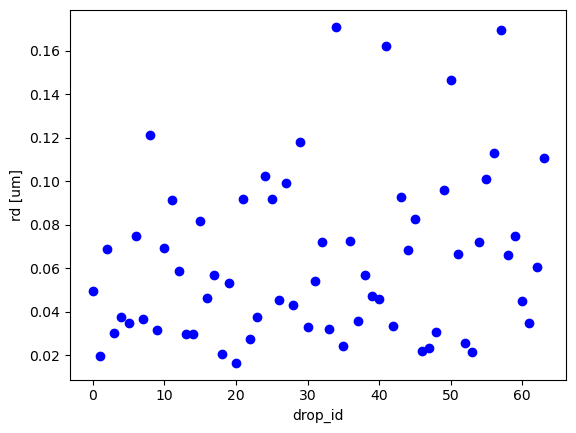

In [4]:
nc = netCDF4.Dataset("/home/agnieszka/Github/libcloudphxx/models/parcel/cmake-build-debug/tests/Grabowski_and_Pawlowska_2023/polluted_25.nc")
rd=(np.asarray(nc['dry radius cubed'][:]))**(1/3)
for drop_id in range(64):
    pyplot.scatter(drop_id,rd[0,drop_id]*1e6,color='b')
    pyplot.ylabel('rd [um]')
    pyplot.xlabel('drop_id')
    #pyplot.yscale('log')